In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

2024-12-31 12:41:38.808265: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data analysis

In [2]:
iris = load_iris()
X, Y = iris.data, iris.target

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


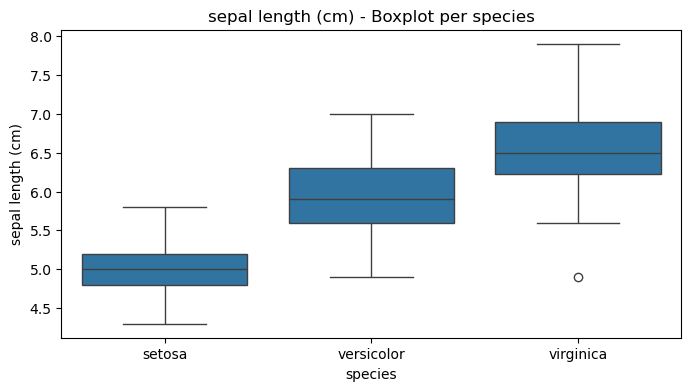

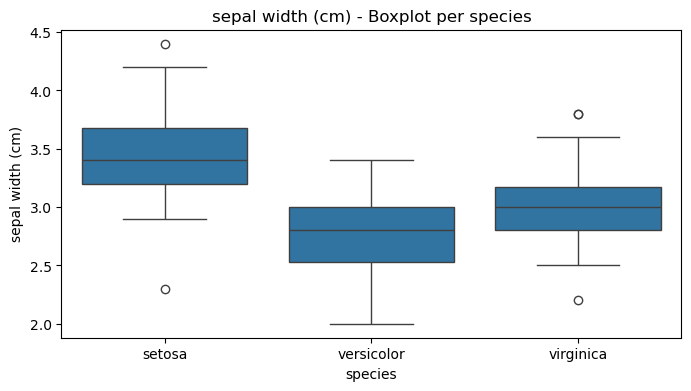

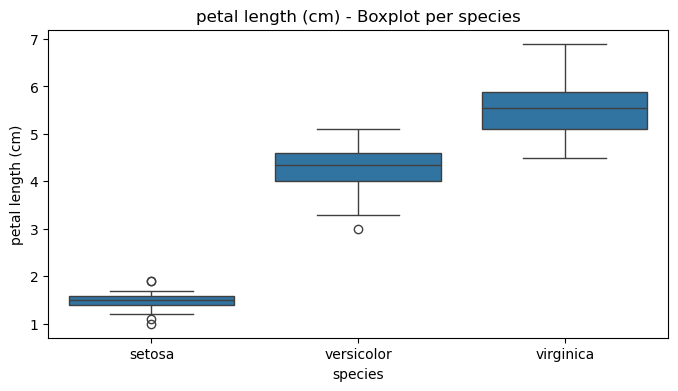

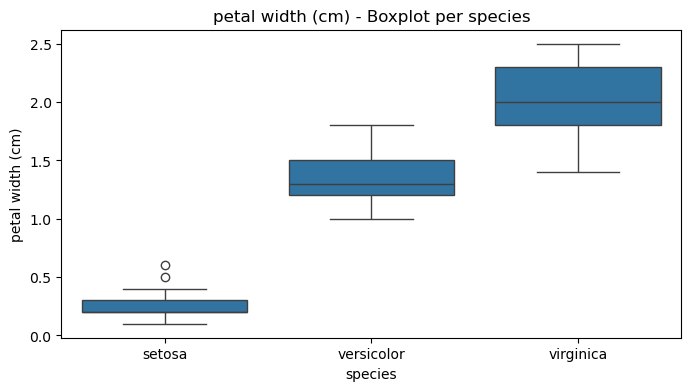

In [4]:
for feature in iris.feature_names:
    plt.figure(figsize = (8, 4))
    sns.boxplot(x = 'species', y = feature, data = iris_df)
    plt.title(f"{feature} - Boxplot per species")
    plt.show()

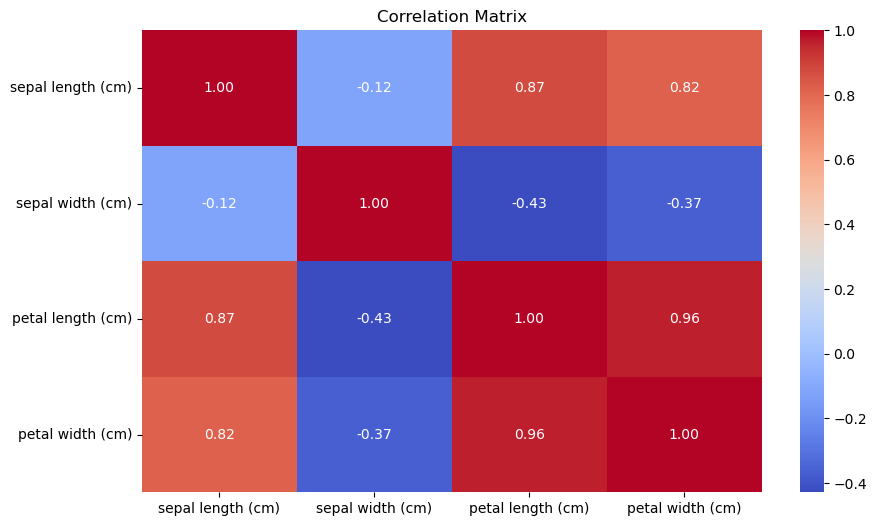

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(iris_df.iloc[:, :-2].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

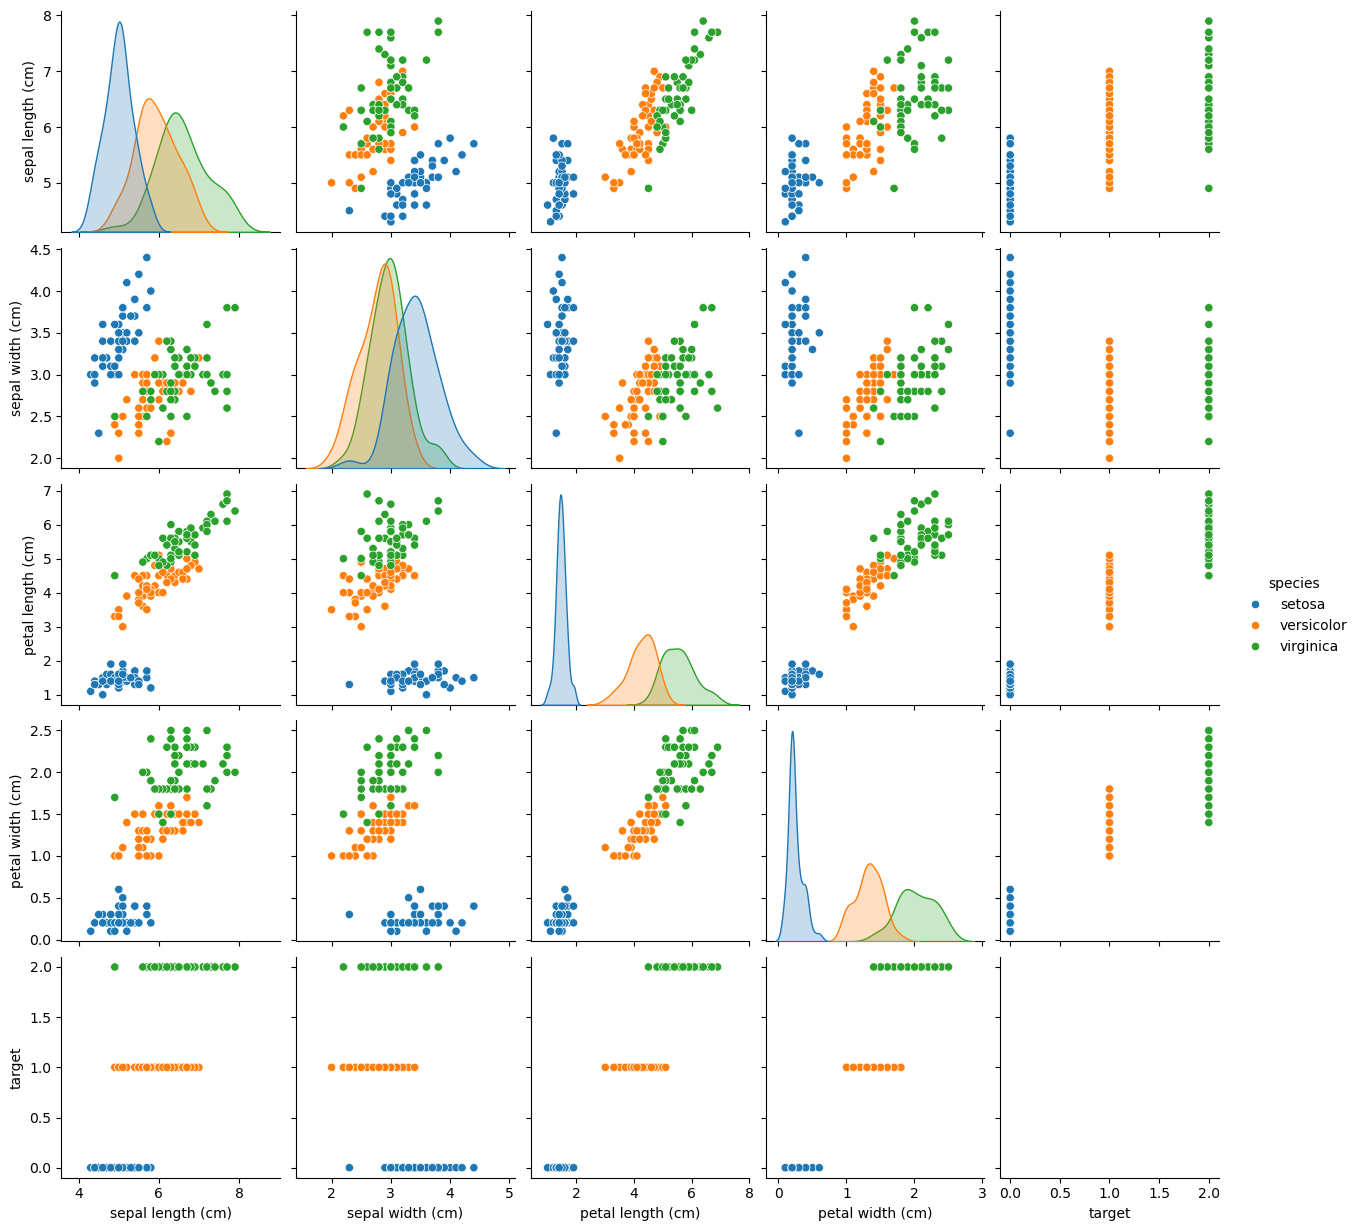

In [6]:
sns.pairplot(iris_df, hue="species")
plt.show()

# Model preparation

In [7]:
# Podział danych na treningowe i testowe
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encoding etykiet
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [8]:
def create_model(architecture, activation, optimizer):
    model = Sequential()
    model.add(Input(shape = (X_train.shape[1],)))

    for n_neurons in architecture:
        model.add(Dense(n_neurons, activation=activation))
    
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
# Eksperymenty z różnymi konfiguracjami
activations = ["relu", "tanh", "sigmoid"]
optimizers = ["adam", "sgd"]
architectures = [
    [3, 3],
    [3, 3, 3, 3, 3, 3, 3],
    [8, 16, 16, 8],
    [128],
    [64, 64]
]

histories = []
for activation in activations:
    for optimizer in optimizers:
        for architecture in architectures:
            architecture_str = [str(arch) for arch in architecture]
            # optimizer_str = "adam" if optimizer == "adam" else optimizer.name
            architecture_str = f"[4->{'-'.join(architecture_str)}->3]"
            model_name = f"{architecture_str: <25} | {optimizer: <7} | {activation.title(): <10}"

            model = create_model(architecture=architecture, activation=activation, optimizer=optimizer)
            try:
                history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)
                print(model_name)
                histories.append((model_name, model, history))
            except Exception as e:
                print(f"Failed to train {model_name} model: {e}")